# 1. Boston 주택 가격 예측 모델


- 데이터셋의 feature에 대한 설명


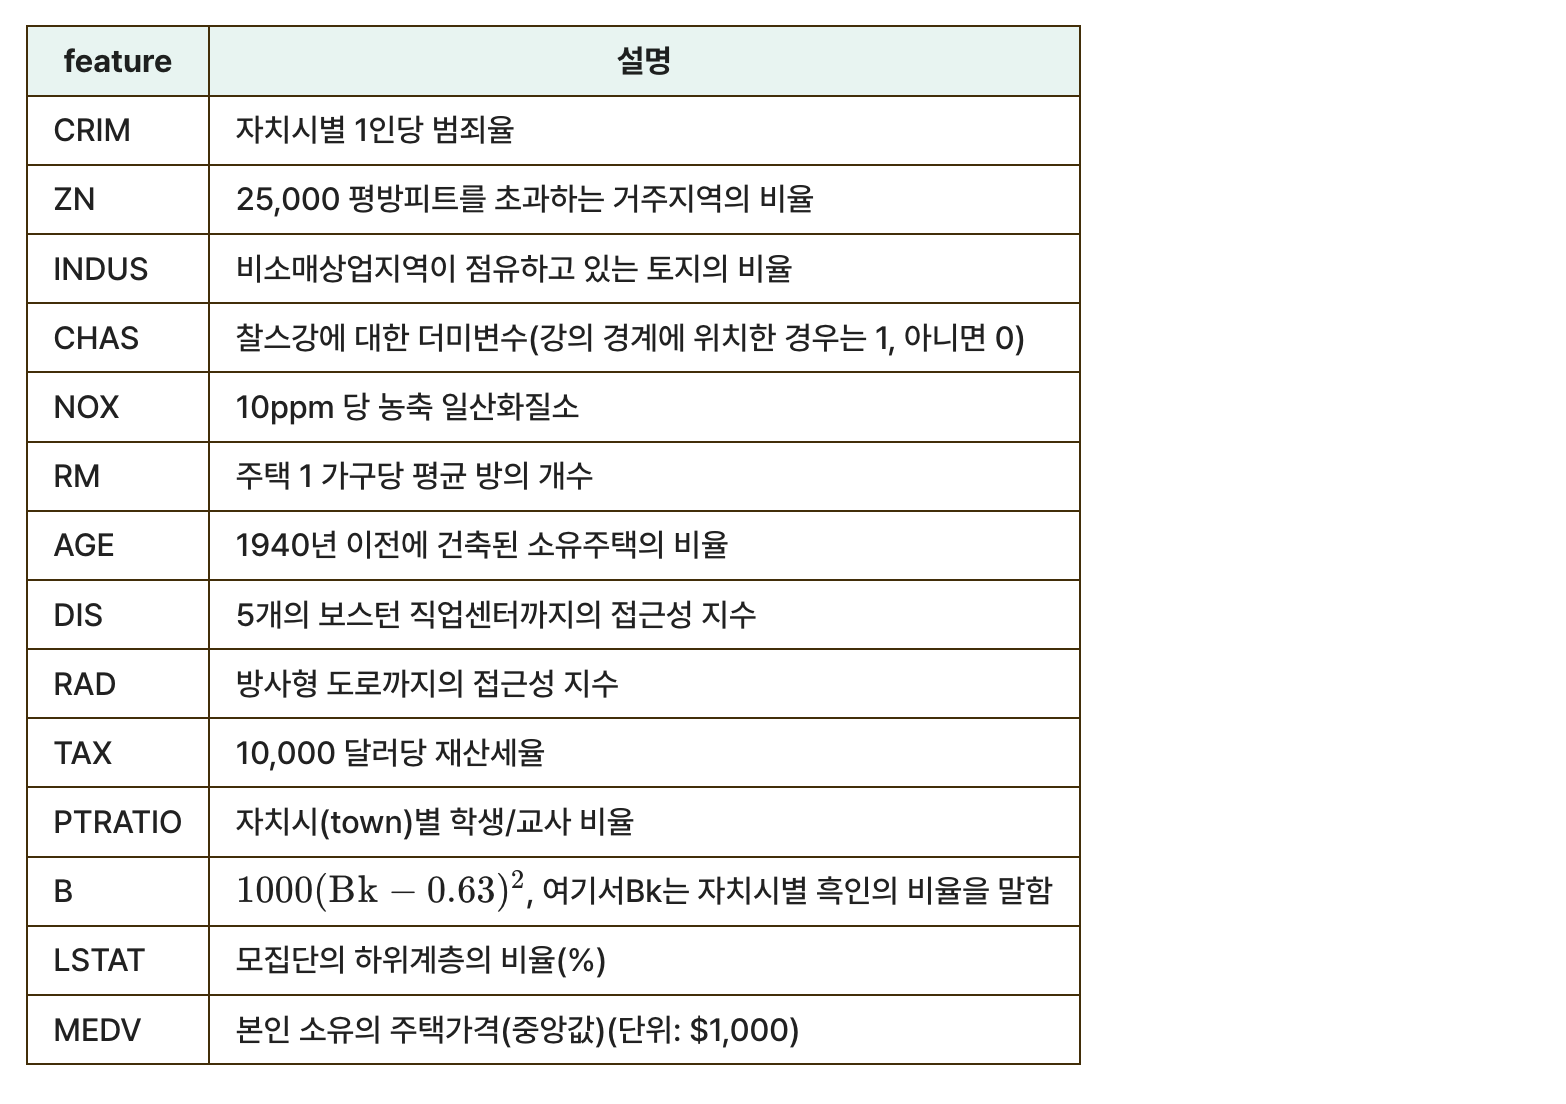

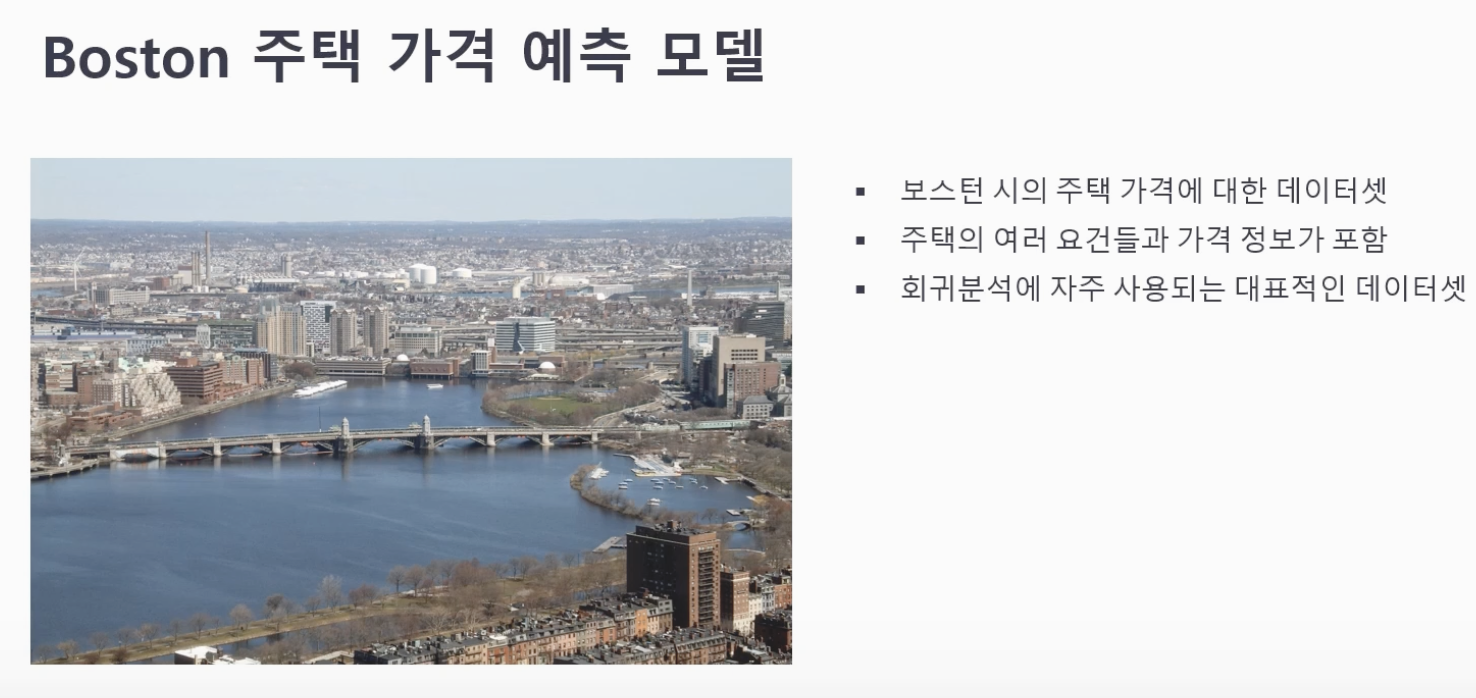

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

65536/57026 [==================================] - 0s 0us/step
404
102


### 데이터 전처리
- 값의 범위가 다르면 제대로 학습하기 어렵기 때문
- 표준화 (Standardization)
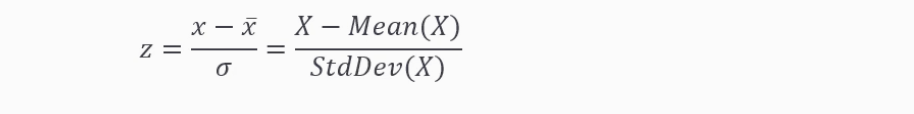

In [58]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

### 모델 구성 및 컴파일

In [59]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()

In [60]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [61]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels, epochs=80, batch_size=16, validation_split=0.2, verbose=0)

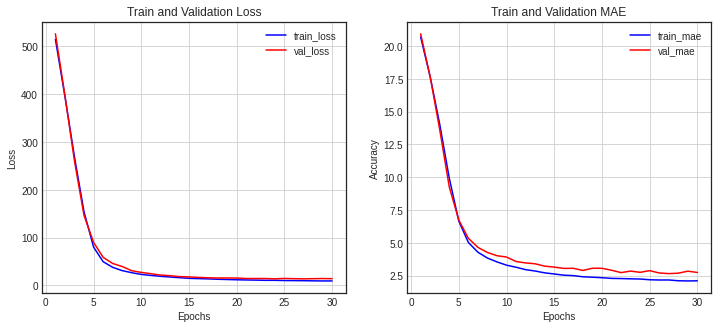

In [25]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [62]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_acc}')

4/4 [==============================] - 0s 2ms/step - loss: 22.8905 - mae: 2.9267
Test Loss: 22.890453338623047
Test Accuracy: 2.926741600036621


In [23]:
from keras.models import Sequential
from keras.layers import Dense
# 모델 구성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# 모델 구조 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


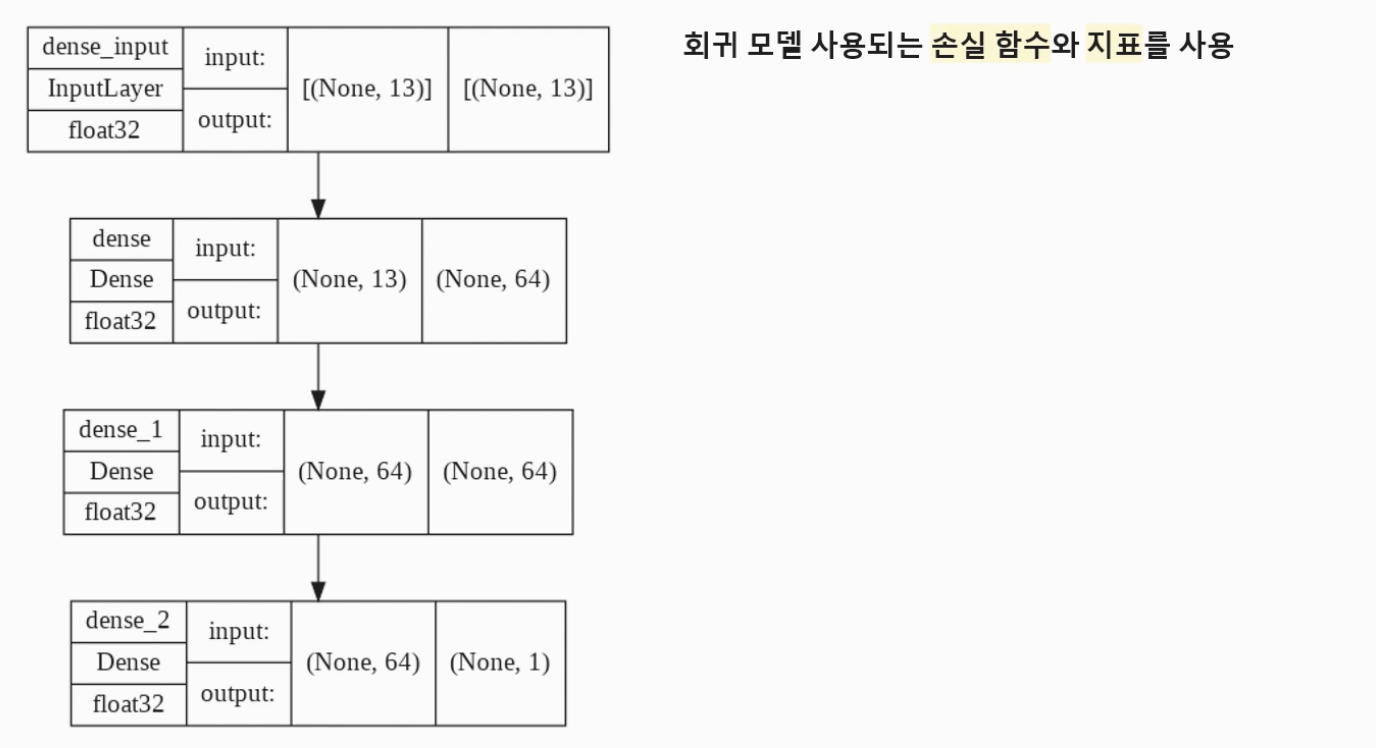

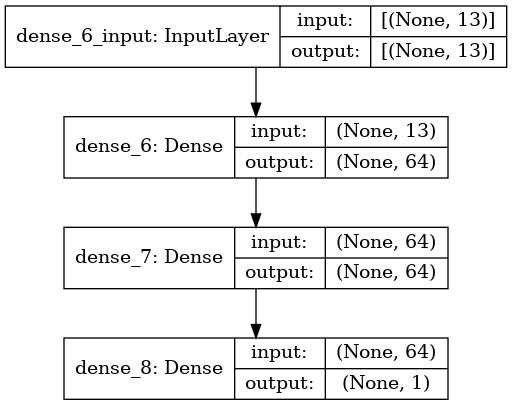

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

# 모델 구성
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(13,), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 모델 구조 요약
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                448       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(train_data, train_labels, epochs=80, batch_size=16, validation_split=0.2, verbose=0)

In [57]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_acc}')

4/4 [==============================] - 0s 2ms/step - loss: 24.1068 - mae: 3.2845
Test Loss: 24.106801986694336
Test Accuracy: 3.2845399379730225


- L2, dropout 써봤는데 처음에 만든 모델이 성능이 더 좋다. 오차가 더 적음

# 2. Reuters 딥러닝 모델


- 데이터셋


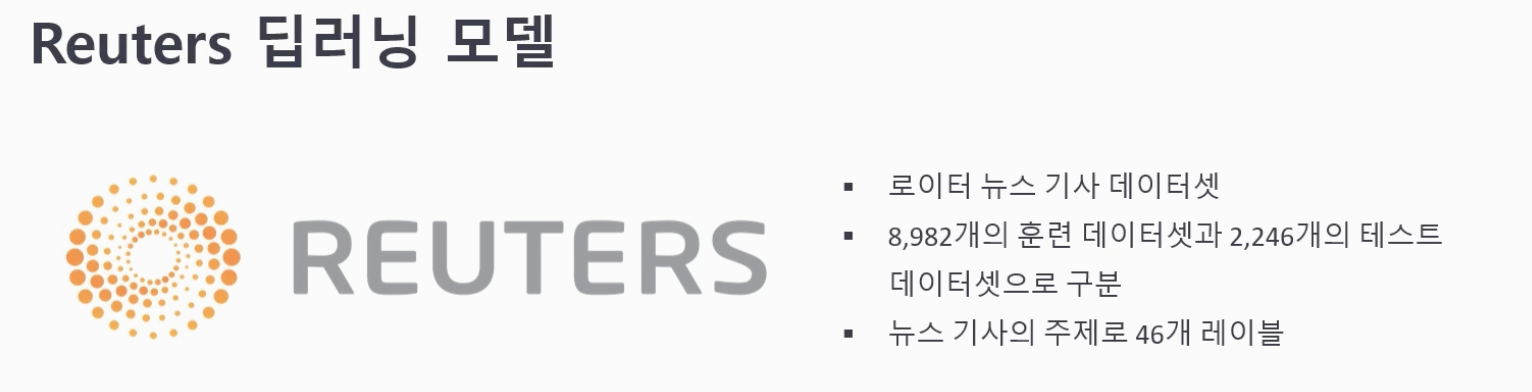

- ReLU와는 다른 활성화함수
- BatchNormalization, Dropout 적용
- ModelCheckpoint, EarlyStopping 콜백 함수 적용

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [64]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data_full, train_labels_full, 
                                                 test_size=0.25,
                                                 random_state=42)

2121728/2110848 [==============================] - 0s 0us/step


In [65]:
print(f"전체 학습 데이터: {train_data_full.shape} 레이블: {train_labels_full.shape}")
print(f"학습 데이터: {train_data.shape} 레이블: {train_labels.shape}")
print(f"검증 데이터: {val_data.shape} 레이블: {val_labels.shape}")
print(f"테스트 데이터: {test_data.shape} 레이블: {test_labels.shape}")

전체 학습 데이터: (8982,) 레이블: (8982,)
학습 데이터: (6736,) 레이블: (6736,)
검증 데이터: (2246,) 레이블: (2246,)
테스트 데이터: (2246,) 레이블: (2246,)


### 데이터 전처리
- 텍스트 데이터를 벡터로 변환
    - 원-핫 인코딩 이용하여 텍스트를 0과 1의 벡터로 변환
- 뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩) 이용하여 변환 수행
- 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.





In [74]:
from tensorflow.keras.utils import to_categorical

# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results
    
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

In [5]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
train_labels

array([ 3,  3,  3, ..., 20,  3,  3])

### 모델 구성 및 컴파일

In [75]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                640064    
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 46)              

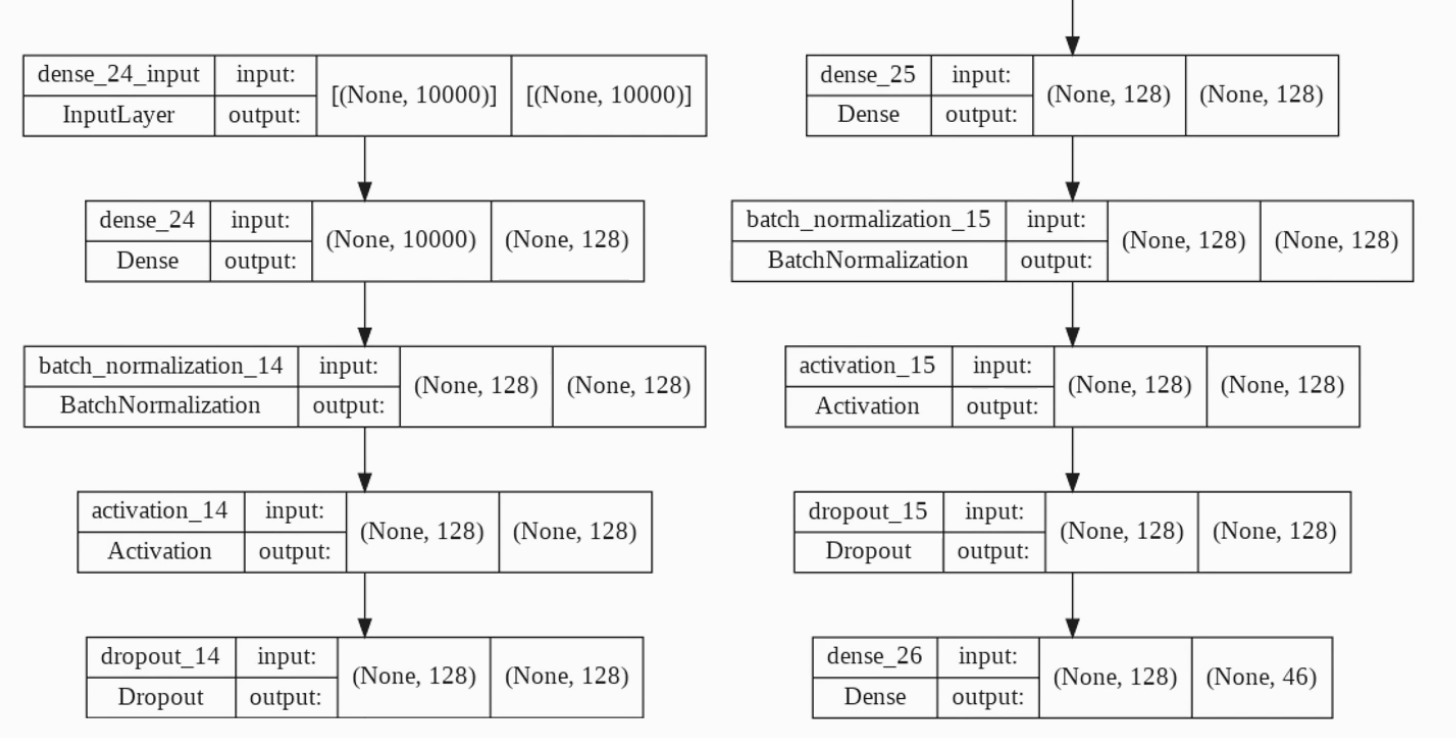

In [68]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                640064    
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 46)              

### 모델 학습

In [76]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_cb = callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
14/14 [==============================] - 2s 47ms/step - loss: 3.8160 - accuracy: 0.1393 - val_loss: 3.5654 - val_accuracy: 0.5352
Epoch 2/20
14/14 [==============================] - 0s 16ms/step - loss: 2.5596 - accuracy: 0.4586 - val_loss: 3.2246 - val_accuracy: 0.6109
Epoch 3/20
14/14 [==============================] - 0s 16ms/step - loss: 2.0231 - accuracy: 0.5916 - val_loss: 2.8908 - val_accuracy: 0.6607
Epoch 4/20
14/14 [==============================] - 0s 15ms/step - loss: 1.7045 - accuracy: 0.6537 - val_loss: 2.6303 - val_accuracy: 0.6745
Epoch 5/20
14/14 [==============================] - 0s 16ms/step - loss: 1.4975 - accuracy: 0.6933 - val_loss: 2.4455 - val_accuracy: 0.6772
Epoch 6/20
14/14 [==============================] - 0s 15ms/step - loss: 1.3310 - accuracy: 0.7164 - val_loss: 2.2629 - val_accuracy: 0.6928
Epoch 7/20
14/14 [==============================] - 0s 14ms/step - loss: 1.2089 - accuracy: 0.7411 - val_loss: 2.1235 - val_accuracy: 0.7017
Epoch 8/20
14

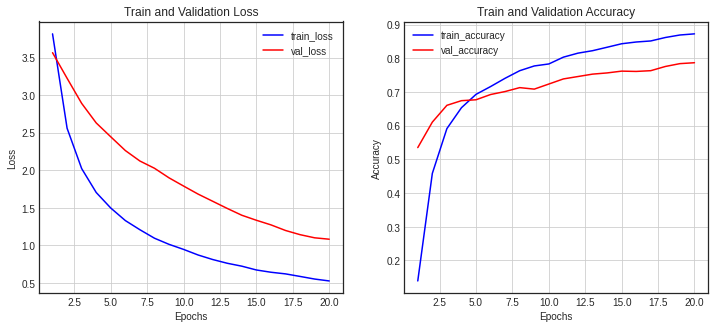

In [77]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [78]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}')

71/71 [==============================] - 0s 3ms/step - loss: 1.1244 - accuracy: 0.7609
Test Loss: 1.124442219734192
Test Accuracy: 0.760908305644989


- 나쁘지 않은데 좀더 개선해볼 수 있지 않을까?

Epoch 1/40
15/15 [==============================] - 1s 37ms/step - loss: 2.6500 - accuracy: 0.4604 - val_loss: 2.6303 - val_accuracy: 0.7017
Epoch 2/40
15/15 [==============================] - 0s 14ms/step - loss: 1.3799 - accuracy: 0.7102 - val_loss: 2.1128 - val_accuracy: 0.7423
Epoch 3/40
15/15 [==============================] - 0s 14ms/step - loss: 1.1020 - accuracy: 0.7640 - val_loss: 1.8322 - val_accuracy: 0.7590
Epoch 4/40
15/15 [==============================] - 0s 13ms/step - loss: 0.8630 - accuracy: 0.8079 - val_loss: 1.5864 - val_accuracy: 0.7668
Epoch 5/40
15/15 [==============================] - 0s 13ms/step - loss: 0.7258 - accuracy: 0.8345 - val_loss: 1.3975 - val_accuracy: 0.7618
Epoch 6/40
15/15 [==============================] - 0s 12ms/step - loss: 0.6040 - accuracy: 0.8565 - val_loss: 1.2410 - val_accuracy: 0.7707
Epoch 7/40
15/15 [==============================] - 0s 13ms/step - loss: 0.5107 - accuracy: 0.8759 - val_loss: 1.1669 - val_accuracy: 0.7735
Epoch 8/40
15

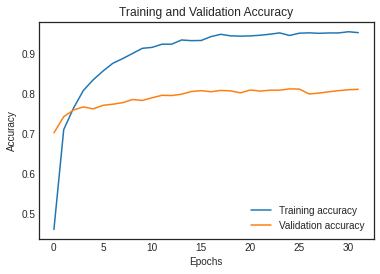

71/71 [==============================] - 0s 3ms/step - loss: 1.2790 - accuracy: 0.7992
Test Loss: 1.2789818048477173
Test Accuracy: 0.799198567867279


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.datasets import reuters
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 로딩 및 전처리
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)
x_train = one_hot_encoding(train_data_full)
x_test = one_hot_encoding(test_data)
y_train = to_categorical(train_labels_full)
y_test = to_categorical(test_labels)

# 모델 구성 변경
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10000,)))  # 뉴런 수 증가
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout 비율 조정
model.add(Dense(128, activation='relu'))  # 추가 레이어와 뉴런 수 증가
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

# 옵티마이저와 학습률 조정
adam_optimizer = Adam(learning_rate=0.003)  # 학습률 조정 0.001 0.003

model.compile(optimizer=adam_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 콜백 함수 설정 변경
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=20),  # patience 값 조정 15 20
    ModelCheckpoint(filepath='best_model_improved.h5', monitor='val_loss', save_best_only=True)
]

# 모델 학습
history = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_split=0.2, callbacks=callbacks_list)

# 결과 시각화
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 모델 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}')


- 0.80 넘기고 싶다 ~~(반올림하기)
- 0.76에서 0.799로 상승
- 베이스라인 모델에서의 성능향상

# 3. CIFAR10 딥러닝 모델

- CIFAR10 데이터셋 : 32x32 픽셀의 6,000개 컬러 이미지
- 데이터셋 각 이미지 10개 클래스로 라벨링

In [96]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [127]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(train_data_full, train_labels_full), (test_data, test_labels) = cifar10.load_data()
train_data, val_data, train_labels, val_labels = train_test_split(train_data_full, train_labels_full, 
                                                 test_size=0.2,
                                                 random_state=42)

In [98]:
print(f"전체 학습 데이터: {train_data_full.shape} 레이블: {train_labels_full.shape}")
print(f"학습 데이터: {train_data.shape} 레이블: {train_labels.shape}")
print(f"검증 데이터: {val_data.shape} 레이블: {val_labels.shape}")
print(f"테스트 데이터: {test_data.shape} 레이블: {test_labels.shape}")

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [85]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

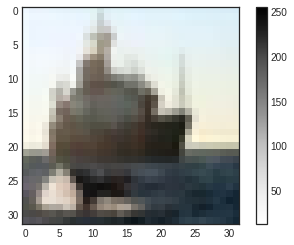

In [112]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(train_data[30])
plt.colorbar()
plt.show()

In [128]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [129]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
import tensorflow as tf

train_data = tf.reshape(train_data, [40000, 3072])
val_data = tf.reshape(val_data, [10000, 3072])
test_data = tf.reshape(test_data, [10000, 3072])

# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
train_data = tf.cast(train_data, tf.float32) / 255.
val_data = tf.cast(val_data, tf.float32) / 255.
test_data = tf.cast(test_data, tf.float32) / 255.


In [130]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


### 모델 구성 및 컴파일

In [132]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

# 모델 구성
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(3072,))) # 3072 input features
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax')) # 10 classes

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_16 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_21 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)             

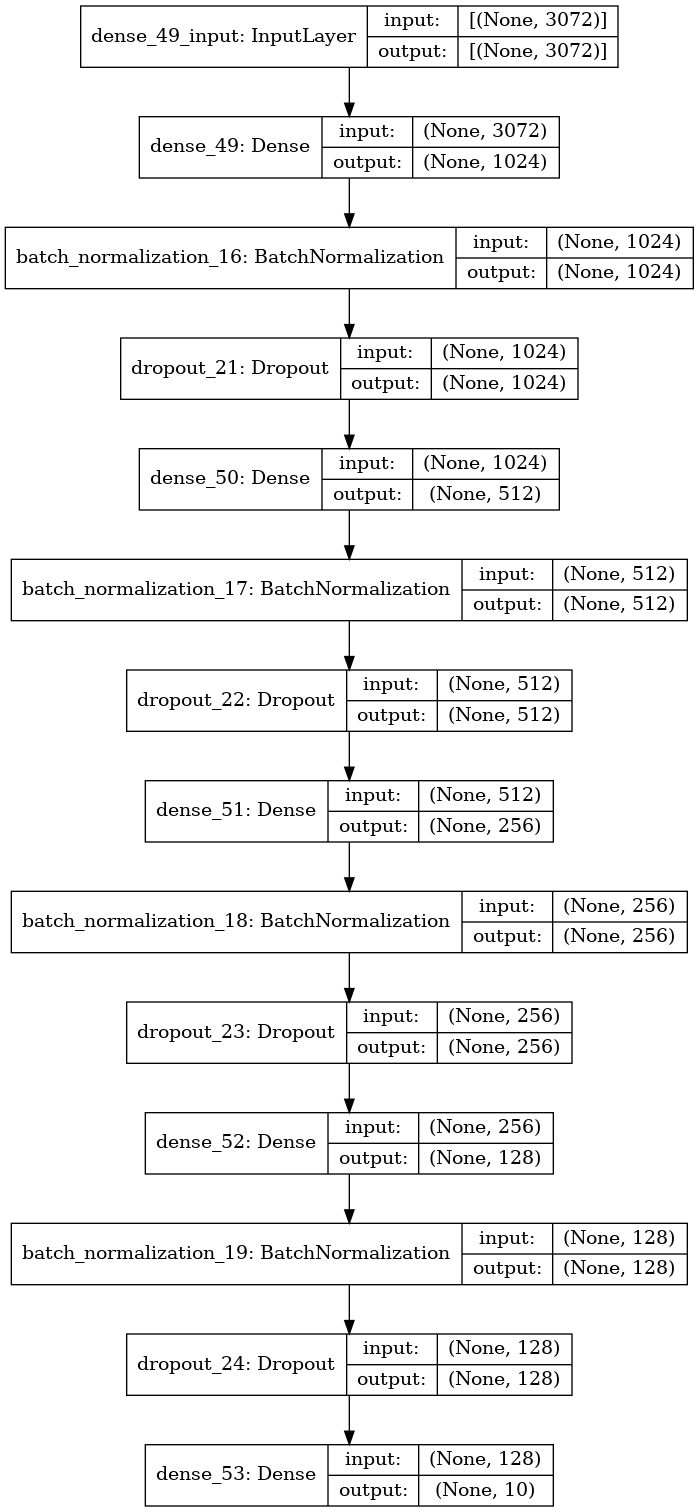

In [133]:
utils.plot_model(model, show_shapes=True)

### 모델 학습

In [134]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# Callbacks
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
]

# Model training
history = model.fit(
    train_data, train_labels,
    epochs=30,
    batch_size=64,
    validation_data=(val_data, val_labels),
    callbacks=callbacks_list
)

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 2.3021 - accuracy: 0.2348 - val_loss: 1.9461 - val_accuracy: 0.2969
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 1.8818 - accuracy: 0.3158 - val_loss: 1.7560 - val_accuracy: 0.3584
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 1.8188 - accuracy: 0.3447 - val_loss: 1.8390 - val_accuracy: 0.3418
Epoch 4/30
625/625 [==============================] - 3s 4ms/step - loss: 1.8028 - accuracy: 0.3514 - val_loss: 1.7406 - val_accuracy: 0.3714
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 1.8090 - accuracy: 0.3479 - val_loss: 1.7472 - val_accuracy: 0.3688
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 1.7920 - accuracy: 0.3592 - val_loss: 1.7578 - val_accuracy: 0.3643
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 1.7738 - accuracy: 0.3647 - val_loss: 1.6320 - val_accuracy: 0.4167
Epoch 

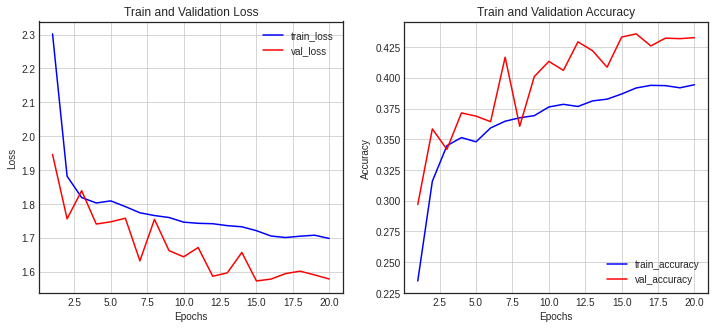

In [135]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [136]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.5553 - accuracy: 0.4437


[1.555250644683838, 0.44369998574256897]

- 너무 낮아서 다른 모델 쓰기
- 평탄화 안하고 cNN

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 1.7019 - accuracy: 0.3830 - val_loss: 1.5002 - val_accuracy: 0.4657
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 1.3217 - accuracy: 0.5335 - val_loss: 1.3213 - val_accuracy: 0.5247
Epoch 3/30
625/625 [==============================] - 3s 4ms/step - loss: 1.1796 - accuracy: 0.5861 - val_loss: 1.2720 - val_accuracy: 0.5437
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 1.0695 - accuracy: 0.6252 - val_loss: 1.0377 - val_accuracy: 0.6437
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 0.9832 - accuracy: 0.6582 - val_loss: 1.0594 - val_accuracy: 0.6316
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.9069 - accuracy: 0.6831 - val_loss: 1.3419 - val_accuracy: 0.5527
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 0.8634 - accuracy: 0.6988 - val_loss: 0.9233 - val_accuracy: 0.6845
Epoch 

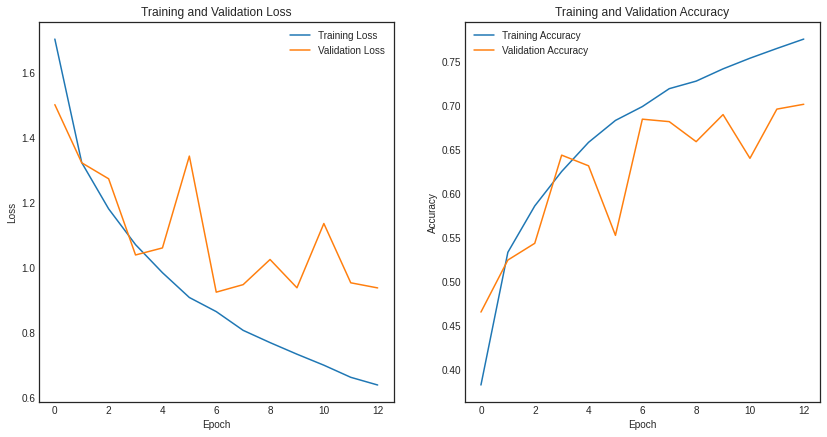

313/313 [==============================] - 1s 2ms/step - loss: 0.9465 - accuracy: 0.7001
Test Loss: 0.9464564323425293
Test Accuracy: 0.7001000046730042


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the dataset and split it into training, validation, and test sets
(train_data_full, train_labels_full), (test_data, test_labels) = cifar10.load_data()
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data_full, train_labels_full, test_size=0.2, random_state=42
)

train_data = train_data / 255.0
val_data = val_data / 255.0
test_data = test_data / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=6),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(
    train_data, train_labels,
    epochs=30,
    batch_size=64,
    validation_data=(val_data, val_labels),
    callbacks=callbacks_list
)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}')


- test 지표는 훨씬 좋아졌다
- 훈련 손실은 지속적으로 감소하고 있으나, 검증 손실은 일정 수준에서 큰 변동성을 보이며 감소 추세가 뚜렷하지 않다. 훈련 정확도는 상승 추세를 보이지만, 검증 정확도 역시 비슷한 패턴을 보이며 높은 변동성을 가지고 있다.
- 이러한 패턴은 모델이 훈련 데이터에 과적합되고 있음을 나타낼 수 있다. 과적합은 모델이 훈련 데이터의 특정 패턴에 지나치게 맞추어져, 새로운 데이터에 대한 일반화 능력이 떨어지는 현상이다..

## 회고

1. 보스턴 집값 예측
- 데이터 전처리의 중요성: 특성의 스케일링이 모델 성능에 큰 영향을 미칩니다. 이를 위해 데이터의 정규화가 필수적입니다.
- 회귀 문제의 평가 지표: 평균 제곱 오차(MSE)와 평균 절대 오차(MAE) 같은 지표를 통해 모델 성능을 평가합니다.
- 과적합 대처 전략: 충분하지 않은 데이터 양에 대처하기 위해, 교차 검증 등의 방법이 유용하게 사용될 수 있습니다.

2. 로이터 뉴스분류
- 텍스트 데이터의 전처리: 원-핫 인코딩을 통해 텍스트 데이터를 벡터화하는 방법을 배웠습니다.
- 다중 클래스 분류: 출력층의 활성화 함수로 softmax를 사용하고, 손실 함수로 categorical_crossentropy를 사용하는 방법을 이해했습니다.
- 과적합 방지 전략: Dropout과 BatchNormalization을 사용하여 모델의 일반화 능력을 향상시키는 방법을 학습했습니다.

- 베이스라인 모델보다 약간의 성능 향상을 이뤄냈지만 추가적으로 고려해볼 수 있는 전략?
- 데이터 전처리 최적화 -> 토큰화, 스탑워드 제거, stemming, lemmatization 등 NLP 전처리 기법

3. CIFAR10 이미지 분류
- 컨볼루션 신경망 (CNN): CNN 아키텍처의 기본 구성을 이해하고, 이미지 데이터에 대해 효과적인 모델을 구축하는 방법을 배웠습니다.
- 이미지 데이터의 처리: 이미지 데이터를 정규화하여 모델의 입력으로 사용하는 방법을 배웠습니다.
- 성능 향상 기법: 모델 학습 과정에서 EarlyStopping과 ModelCheckpoint 콜백 함수를 사용하여, 모델의 과적합을 방지하고 최적의 모델을 저장하는 방법을 학습했습니다.

    3.2 개선전략
- 성과: CIFAR-10은 다양한 객체를 포함하고 있어서 상당히 도전적인 데이터셋이라고 한다. 기본적인 CNN 아키텍처로 71.6%의 정확도를 달성한 것은 좋은 시작점인 듯 하다.
- 추가 전략 : 데이터 증강, 네트워크 깊이, 하이퍼파라미터튜닝, 정규화 기법 추가/조정 
- 과적합을 ... 막자...



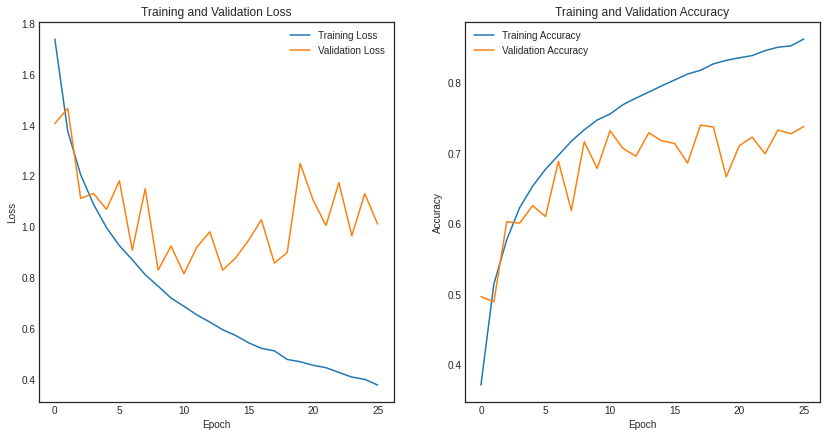
- Patience 
1) 15 : 71.6%
2) 6: 70.7%, 변동성 약간 줄었음